In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('input/top50.csv', encoding='latin-1')
df.head()
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.dtypes

Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

In [5]:
num_features = [feature for feature in df.columns if df[feature].dtypes == 'int64']
num_features

['Beats.Per.Minute',
 'Energy',
 'Danceability',
 'Loudness..dB..',
 'Liveness',
 'Valence.',
 'Length.',
 'Acousticness..',
 'Speechiness.',
 'Popularity']

In [6]:
dfi = df[num_features]

In [23]:
model = KMeans(n_clusters=6)
model.fit(dfi)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
model.labels_

array([5, 3, 2, 5, 4, 5, 1, 0, 1, 4, 2, 0, 4, 2, 0, 0, 2, 4, 1, 1, 1, 1,
       3, 3, 4, 5, 4, 0, 5, 5, 0, 4, 5, 0, 0, 1, 2, 1, 1, 5, 0, 5, 0, 1,
       5, 0, 2, 5, 0, 5])

In [25]:
model.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [28]:
df['cluster'] = model.labels_

In [29]:
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,cluster
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,5
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,3
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,2
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,5
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,4


In [12]:
df.Genre.value_counts()

dance pop           8
pop                 7
latin               5
edm                 3
canadian hip hop    3
reggaeton           2
brostep             2
electropop          2
country rap         2
panamanian pop      2
dfw rap             2
canadian pop        2
reggaeton flow      2
boy band            1
big room            1
australian pop      1
r&b en espanol      1
atl hip hop         1
escape room         1
trap music          1
pop house           1
Name: Genre, dtype: int64

Working inertia to determine how many clusters

<IPython.core.display.Javascript object>


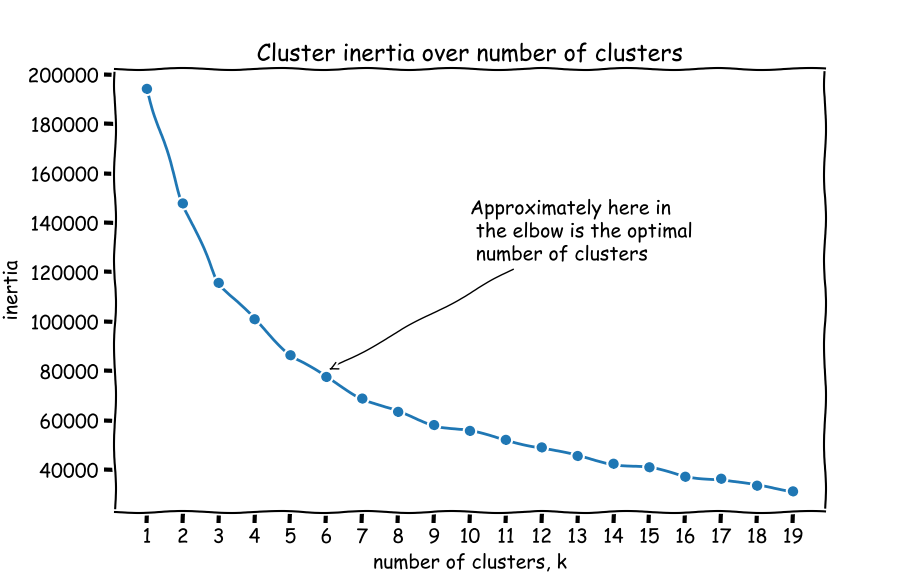

In [18]:
ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(dfi)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
with plt.xkcd():
    plt.plot(ks, inertias, '-o')
    plt.annotate(
    'Approximately here in\n the elbow is the optimal\n number of clusters',
    xy=(6, 80000), arrowprops=dict(arrowstyle='->'), xytext=(10, 125000))

    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.title('Cluster inertia over number of clusters')
    plt.show()

Plotting clusters with TSNE

<IPython.core.display.Javascript object>


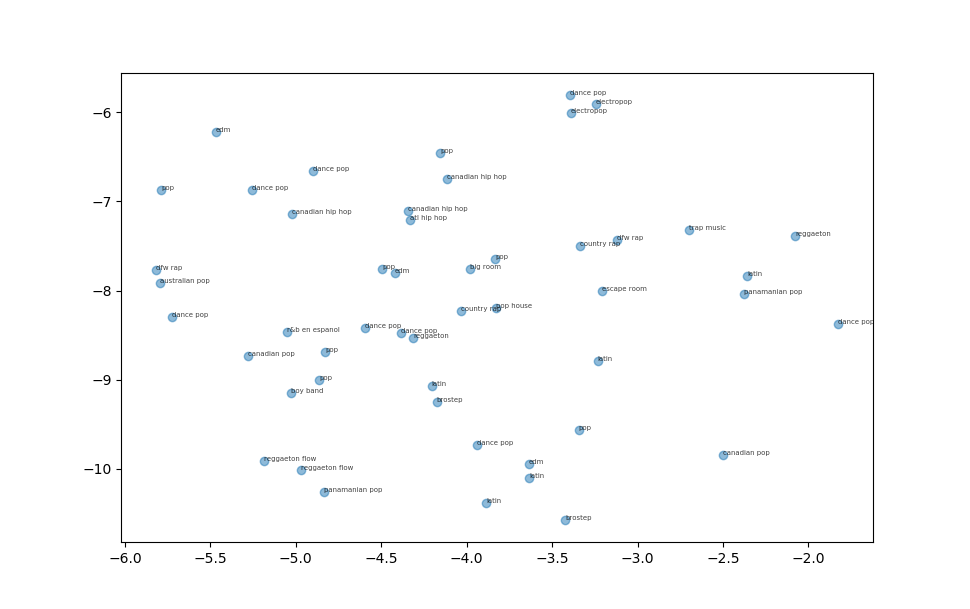

In [13]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Normalize the input
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normal_dfi = scaler.fit_transform(dfi)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normal_dfi)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, genre in zip(xs, ys, df['Genre']):
    plt.annotate(genre, (x, y), fontsize=5, alpha=0.75)
plt.show()

# Linkage and dendograms

In [35]:
tf = df[['Danceability', 'Popularity', 'cluster']]
print(tf.head())

   Danceability  Popularity  cluster
0            76          79        5
1            79          92        3
2            40          85        2
3            64          86        5
4            58          94        4


<IPython.core.display.Javascript object>


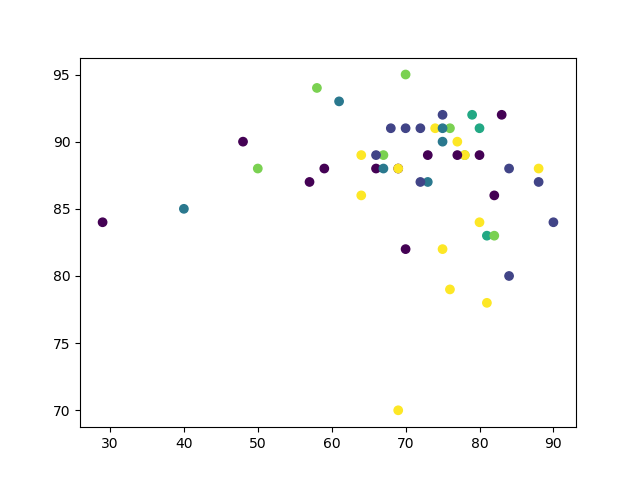

In [42]:
_ = plt.scatter(tf.Danceability, tf.Popularity, c=tf.cluster)
plt.show()

<IPython.core.display.Javascript object>


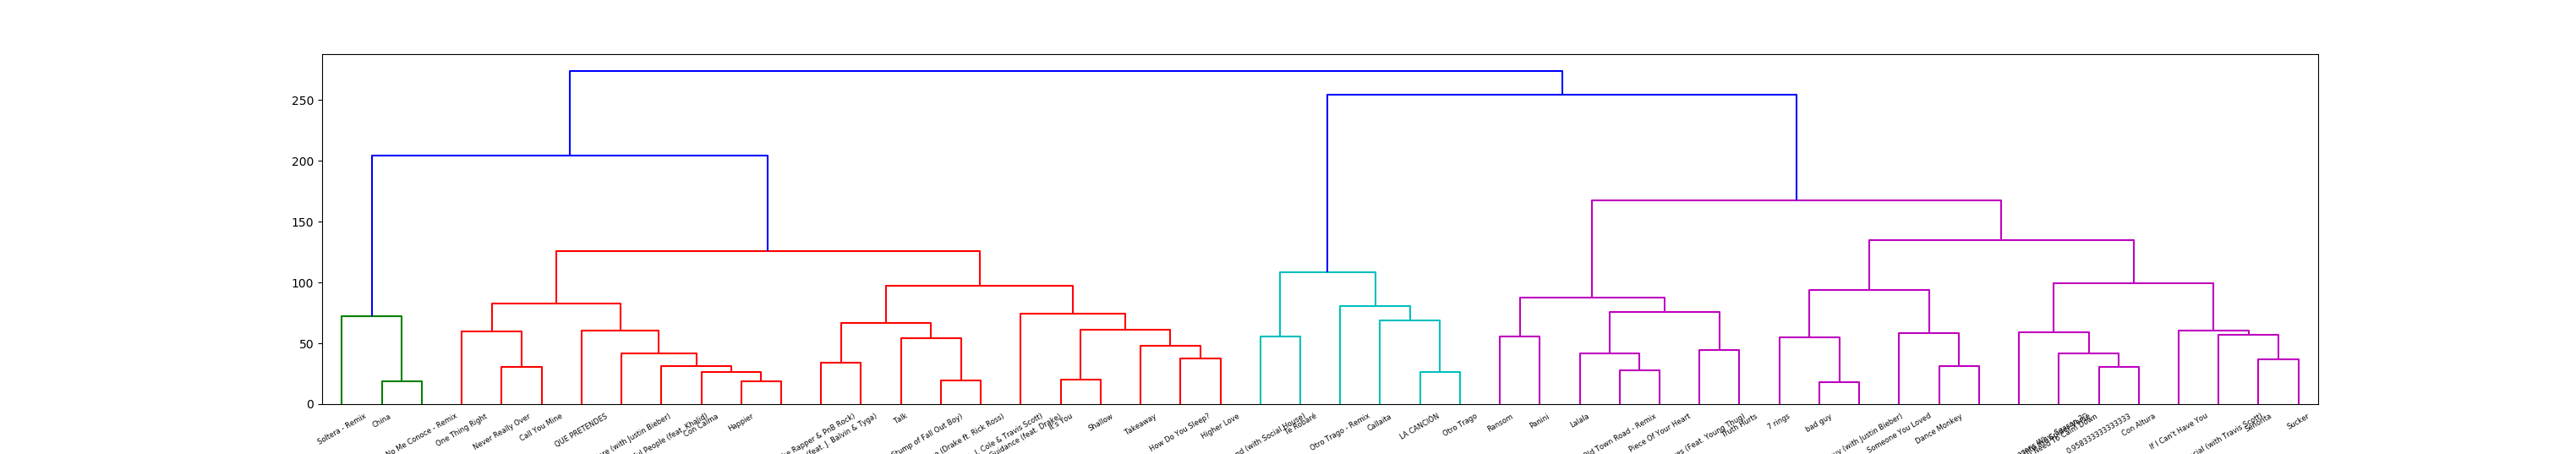

In [59]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(dfi, method='ward')

dendrogram(mergings, labels=df['Track.Name'].to_list(), leaf_rotation=30, leaf_font_size=6)
plt.show()


In [65]:
from scipy.cluster.hierarchy import fcluster

ct = pd.crosstab(df['Genre'], df['cluster'])

print(ct)

cluster           0  1  2  3  4  5
Genre                             
atl hip hop       1  0  0  0  0  0
australian pop    0  0  0  0  1  0
big room          0  1  0  0  0  0
boy band          0  1  0  0  0  0
brostep           1  0  0  0  0  1
canadian hip hop  2  1  0  0  0  0
canadian pop      0  0  0  0  0  2
country rap       0  2  0  0  0  0
dance pop         4  0  1  0  1  2
dfw rap           0  0  0  0  2  0
edm               3  0  0  0  0  0
electropop        0  0  0  0  2  0
escape room       0  1  0  0  0  0
latin             0  0  2  1  0  2
panamanian pop    0  0  2  0  0  0
pop               1  2  0  0  1  3
pop house         0  1  0  0  0  0
r&b en espanol    0  0  0  0  0  1
reggaeton         0  0  1  0  0  1
reggaeton flow    0  0  0  2  0  0
trap music        0  1  0  0  0  0
